# Movie Lens 100K EDA
## Import Libraries

In [1]:
import numpy as np
import pandas as pd

# For Graphing Data
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and Inspecting the Data
### Load the Datasets

In [2]:
file_path_ratings = 'Dataset/ratings.csv'
file_path_movies = 'Dataset/movies.csv'

df_ratings = pd.read_csv(file_path_ratings)
df_movies = pd.read_csv(file_path_movies)

### Check for null values and get general info

In [3]:
print("Info for Ratings Dataframe: ")
print(df_ratings.info())
print("\nInfo for Movies Dataframe: ")
print(df_movies.info())

Info for Ratings Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Info for Movies Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [4]:
print(f"Null Count for Ratings Dataframe: \n{df_ratings.isnull().sum()}\n")
print(f"Null Count for Movies Dataframe: \n{df_movies.isnull().sum()}")

Null Count for Ratings Dataframe: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Null Count for Movies Dataframe: 
movieId    0
title      0
genres     0
dtype: int64


There are **no missing values** in either dataset.

### General Statistics

In [5]:
print("---ratings.csv statistics---")
print(f"Unique Users: {df_ratings['userId'].nunique()}")
print(f"Unique Movies from Ratings Dataframe: {df_ratings['movieId'].nunique()}")
print(f"Total Ratings: {len(df_ratings)}\n")

print("---movies.csv statistics---")
print(f"Unique Movies from Movies Dataframe: {df_movies['movieId'].nunique()}")
print(f"Unique Titles: {df_movies['title'].nunique()}")
print(f"Total Movies: {len(df_movies)}")

---ratings.csv statistics---
Unique Users: 610
Unique Movies from Ratings Dataframe: 9724
Total Ratings: 100836

---movies.csv statistics---
Unique Movies from Movies Dataframe: 9742
Unique Titles: 9737
Total Movies: 9742


Cannot see the number of unique genres because they need to be processed first. Current form example: Adventure|Animation|Children|Comedy|Fantasy 

## Ratings Data Analysis

In [6]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


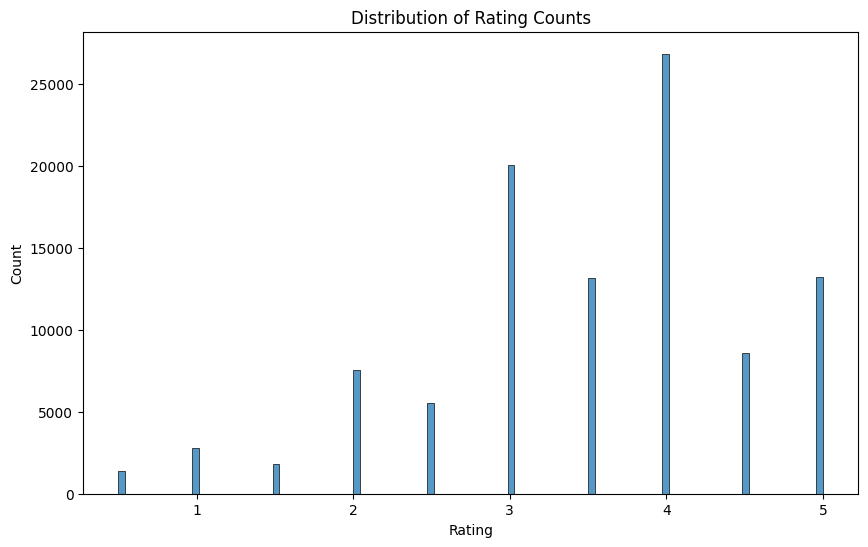

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ratings['rating'], kde=False)
plt.title('Distribution of Rating Counts')
plt.xlabel('Rating')
plt.show()

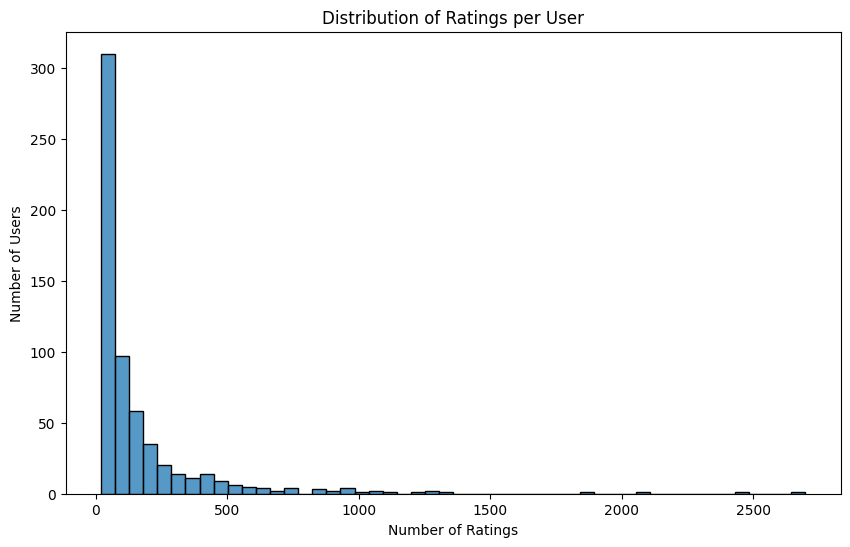

In [8]:
ratings_per_user = df_ratings['userId'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(data=ratings_per_user, bins=50)
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

Some users have submitted over 2000 movie ratings. These outliers could either be useful(someone who watches a lot of movies) or spam.

## Movie Data Analysis

### Dupliactes

In [9]:
duplicates = df_movies[df_movies['title'].duplicated(keep=False)]
duplicates

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


There are only a few duplicates so they can be merged manually. Since there are discrepancies in the genre tags, I would recommend finding out these movie genres manually and updating the data. The duplicates can then be discarded.

### Genres

In [10]:
genre_split = df_movies['genres'].str.split('|')
flattened_genre_split = [item for sublist in genre_split for item in sublist]
unique_genres = set(flattened_genre_split)
unique_genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [11]:
print(f"Number of Unique Genres (including '(no genres listed)': \n{len(unique_genres)}")

Number of Unique Genres (including '(no genres listed)': 
20


In [12]:
genre_split = genre_split.to_frame()
df_genres = genre_split.reindex(genre_split.columns.tolist() + list(unique_genres), axis=1, fill_value=0)
df_genres.head()

,genres,(no genres listed),Film-Noir,Animation,Musical,Sci-Fi,Crime,Drama,Action,Mystery,...,Comedy,Western,Children,Fantasy,Romance,IMAX,Documentary,Thriller,Horror,Adventure
0,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Adventure, Children, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[Comedy, Romance]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama, Romance]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[Comedy],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
genre_split.head()

,genres
0,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,"[Adventure, Children, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]


In [14]:
for idx, genre_list in enumerate(genre_split['genres']):
    for genre in genre_list:
        df_genres.loc[idx, genre] = 1

df_genres.head()

,genres,(no genres listed),Film-Noir,Animation,Musical,Sci-Fi,Crime,Drama,Action,Mystery,...,Comedy,Western,Children,Fantasy,Romance,IMAX,Documentary,Thriller,Horror,Adventure
0,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
1,"[Adventure, Children, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,"[Comedy, Romance]",0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,"[Comedy, Drama, Romance]",0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,[Comedy],0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
df_genres = df_genres.drop(['genres'], axis=1)
df_movies = df_movies.drop(['genres'], axis=1)

In [16]:
genre_sums = df_genres.sum()    # Saved for graph
genre_sums

(no genres listed)      34
Film-Noir               87
Animation              611
Musical                334
Sci-Fi                 980
Crime                 1199
Drama                 4361
Action                1828
Mystery                573
War                    382
Comedy                3756
Western                167
Children               664
Fantasy                779
Romance               1596
IMAX                   158
Documentary            440
Thriller              1894
Horror                 978
Adventure             1263
dtype: int64

In [17]:
df_movies = pd.concat([df_movies, df_genres], axis=1)
df_movies.head()

,movieId,title,(no genres listed),Film-Noir,Animation,Musical,Sci-Fi,Crime,Drama,Action,...,Comedy,Western,Children,Fantasy,Romance,IMAX,Documentary,Thriller,Horror,Adventure
0,1,Toy Story (1995),0,0,1,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
1,2,Jumanji (1995),0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,3,Grumpier Old Men (1995),0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


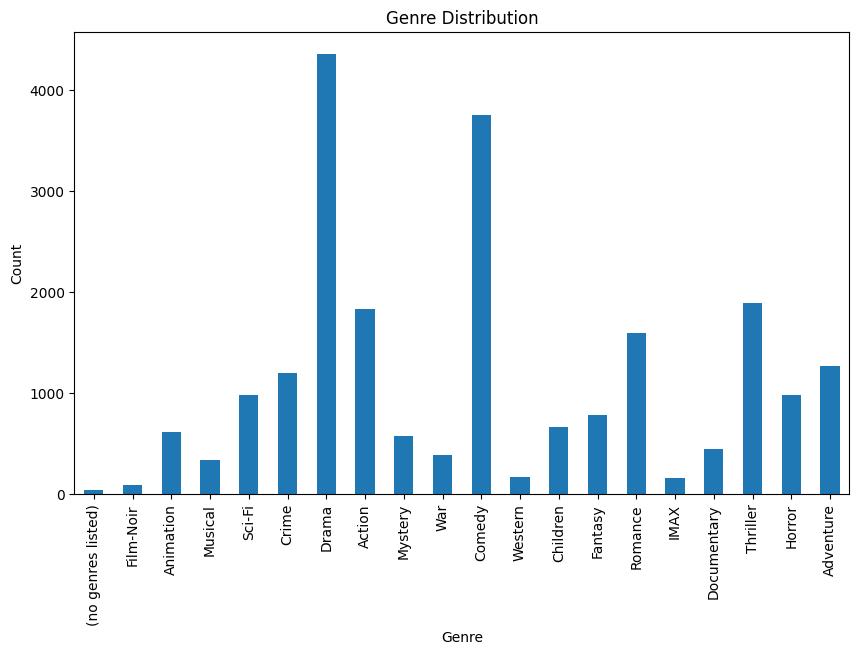

In [18]:
plt.figure(figsize=(10, 6))
genre_sums.plot(kind='bar', title='Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

### Movie Years

In [ ]:
df_movies['year'] = df_movies['title'].str.extract(r'^(?:.*\(|\()([^(]+)\)(?:[^()]*\))?$')
print(df_movies['year'].info())
print(df_movies['year'].head())
print(df_movies['year'].unique())

<class 'pandas.core.series.Series'>
RangeIndex: 9742 entries, 0 to 9741
Series name: year
Non-Null Count  Dtype 
--------------  ----- 
9719 non-null   object
dtypes: object(1)
memory usage: 76.2+ KB
None
0    1995
1    1995
2    1995
3    1995
4    1995
Name: year, dtype: object
['1995' '1994' '1996' '1976' '1992' '1967' '1993' '1964' '1977' '1965'
 '1982' '1990' '1991' '1989' '1937' '1940' '1969' '1981' '1973' '1970'
 '1955' '1959' '1968' '1988' '1997' '1972' '1943' '1952' '1951' '1957'
 '1961' '1958' '1954' '1934' '1944' '1960' '1963' '1942' '1941' '1953'
 '1939' '1950' '1946' '1945' '1938' '1947' '1935' '1936' '1956' '1949'
 '1932' '1975' '1974' '1971' '1979' '1987' '1986' '1980' '1978' '1985'
 '1966' '1962' '1983' '1984' '1948' '1933' '1931' '1922' '1998' '1929'
 '1930' '1927' '1928' '1999' '2000' '1926' '1919' '1921' '1925' '1923'
 '2001' '2002' '2003' '1920' '1915' '1924' '2004' '1916' '1917' nan '2005'
 '2006' '1902' '1903' '2007' '2008' '2009' '2010' '2011' '2012' '2013'
 '201

In [20]:
print(f"Number of occurences of the value '2006–2007': {df_movies['year'].value_counts()['2006–2007']}") # Weird '-' character in '2006-2007'
print(f"Number of missing year values: {df_movies['year'].isna().sum()}")

Number of occurences of the value '2006–2007': 1
Number of missing year values: 23


In [21]:
bool_series = pd.isnull(df_movies['year'])
missing_year_data = df_movies[bool_series]
print(missing_year_data)

      movieId                                              title  \
5609    27008   From Dusk Till Dawn 2: Texas Blood Money (1999)    
6059    40697                                          Babylon 5   
6706    58404           Justice League: The New Frontier (2008)    
6718    58842                      Assembly (Ji jie hao) (2007)    
7878    94494                                 96 Minutes (2011)    
7896    95004                          Superman/Doomsday (2007)    
7910    95193      Pocahontas II: Journey to a New World (1998)    
7978    96608                              Runaway Brain (1995)    
8148   102084                       Justice League: Doom (2012)    
8228   104017               3 dev adam (Three Giant Men) (1973)    
8302   106648           Guilty of Romance (Koi no tsumi) (2011)    
8565   116668                  Dead Snow 2: Red vs. Dead (2014)    
9031   140956                                   Ready Player One   
9091   143410                                   

Found that the movies that are coming up as None values have a ' ' character at the end of the title before the ',' when inspecting the raw movies.csv file.

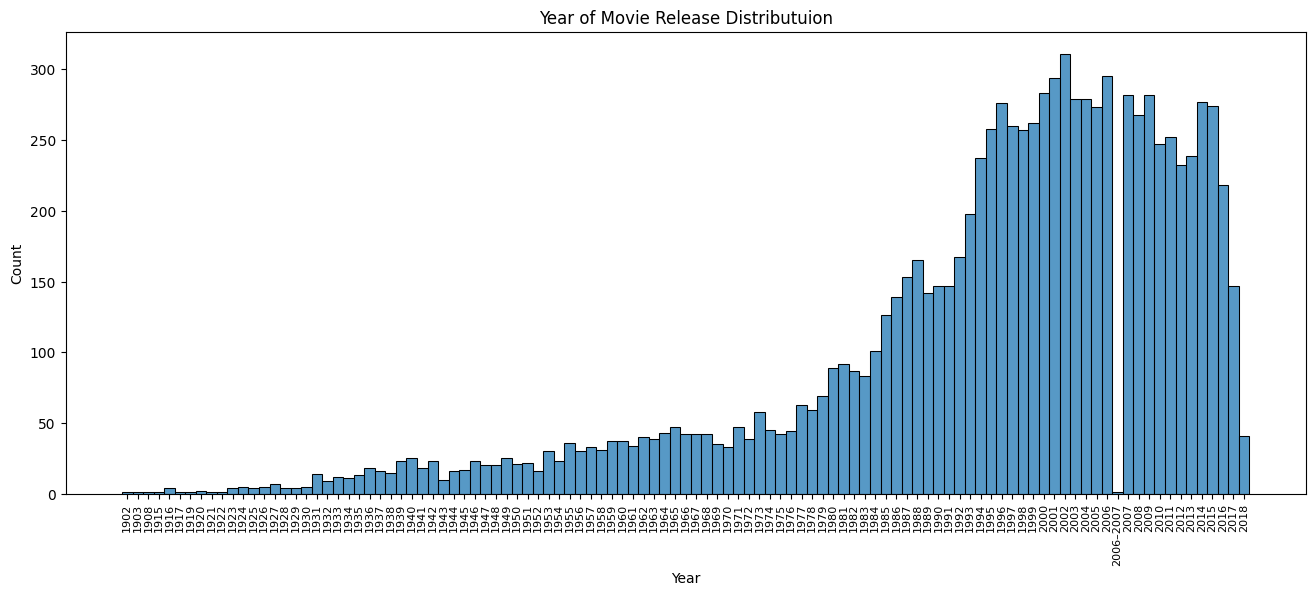

In [22]:
plt.figure(figsize=(16, 6))
sns.histplot(df_movies['year'].sort_values(), discrete=True)
plt.title('Year of Movie Release Distributuion')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 90, fontsize=8)
plt.show()

While there are more datapoints to be fixed, this graph still shows that majority of the movies in the dataset were made between 1993 and 2016.

It is also important to note that the dataset does **not** have any movie data before 1902 or after 2018.

## External Research
### Removing Duplicates
Emma (1996) is a Romance/Drama also has an element of mischief so comedy as well
* Remove movieId 26958 since it is only labeled as romance
* Change ratings with movieId from 26958 to 838

For Saturn 3 (1980), imdb has adventure, sci-fi, and thriller listed
* Remove movieId 168358 since it does not have adventure
* Change ratings with movieId from 168358 to 2851

Confessions of a Dangerous Mind (2002)
* Remove movieId 6003, missing romance
* Change ratings with movieId from 6003 to 144606

Eros (2004)
* Remove movieId 32600, missing romance
* Change ratings with movieId from 32600 to 147002

War of the Worlds (2005)
* Remove movieId 64997, missing thriller and adventure
* Change ratings with movieId from 64997 to 34048


## Summary
### Observations
* No null-values
* Some movie title duplicates exist because they have different genres 
* Some movies have been assigned a '(no genres listed)' category
* Not all movie titles have the movie's release year (12 missing, 11 have extra space at the end of title string, and 1 has an inbetween year '2006-2007')
* User rating distribution is logarithmic and has outliers.

### Recommendations
* Multi-hot encoding to represent genres
* Manually fix duplicate genre discrepancies and discard unused duplicates.
* Removing the year from the movie titles and possibly making a separate feature just for the movie years.
    * This will require filling in NaN values
    * Fix the movie titles that have a ' ' at the end to make it easier to strip the string.
    * Manually fix the movie that has the year (2006-2007). Either research or pick one at random.
* Check all of the '(no genres listed)' movies and manually update the genres.